In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

(x_train, t_train), (x_test, t_test) = fashion_mnist.load_data()

print('\n train shape = ', x_train.shape, ', train label shape = ', t_train.shape)
print(' test shape = ', x_test.shape, ', test label shape =', t_test.shape)

print('\n train label = ', t_train) # 학습데이터 정답 출력
print(' test label  = ', t_test)    # 테스트 데이터 정답 출력

4423680/4422102 [==============================] - 0s 0us/step

 train shape =  (60000, 28, 28) , train label shape =  (60000,)
 test shape =  (10000, 28, 28) , test label shape = (10000,)

 train label =  [9 0 0 ... 3 0 5]
 test label  =  [9 2 1 ... 8 1 5]


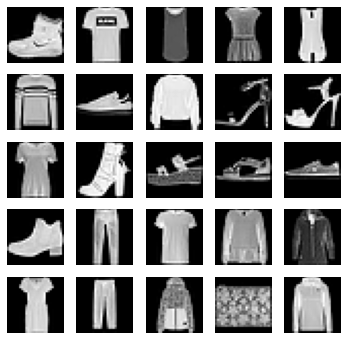

In [5]:
import matplotlib.pyplot as plt

# 25개의 이미지 출력
plt.figure(figsize=(6, 6))

for index in range(25):             # 25개 이미지 출력

    plt.subplot(5, 5, index + 1)    # 5행 5열
    plt.imshow(x_train[index], cmap='gray')
    plt.axis('off')

plt.show()

In [7]:
# 학습 데이터 / 테스트 데이터 정규화(Normalization)
 
x_train = (x_train - 0.0) / (255.0 - 0.0)
x_test = (x_test - 0.0) / (255.0 - 0.0)

 # 정답 원핫 인코딩은 안할거임
 
 # t_train = tf.keras.utils.to_categorical(t_train, num_classes=10)
 # t_test = tf.keras.utils.to_categorical(t_test, num_classes=10)

In [8]:
# 모델 구출 및 컴파일
model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28,28)))

model.add(tf.keras.layers.Dense(100, activation='relu'))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [9]:
hist = model.fit(x_train, t_train, epochs=30, validation_split=0.3) #training data로 부터 30% 비율로 validation data 생성 후 overfitting 확인

Epoch 1/30
1313/1313 [==============================] - 7s 3ms/step - loss: 0.5364 - accuracy: 0.8115 - val_loss: 0.4258 - val_accuracy: 0.8493
Epoch 2/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4068 - accuracy: 0.8542 - val_loss: 0.4021 - val_accuracy: 0.8554
Epoch 3/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3626 - accuracy: 0.8681 - val_loss: 0.3595 - val_accuracy: 0.8719
Epoch 4/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3337 - accuracy: 0.8774 - val_loss: 0.3877 - val_accuracy: 0.8590
Epoch 5/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3128 - accuracy: 0.8846 - val_loss: 0.3832 - val_accuracy: 0.8648
Epoch 6/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2963 - accuracy: 0.8896 - val_loss: 0.3552 - val_accuracy: 0.8726
Epoch 7/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2802 - accuracy: 0.8960 - val_loss: 0.3306 - val_accuracy:

In [10]:
model.evaluate(x_test, t_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4204 - accuracy: 0.8793


[0.4203732907772064, 0.8792999982833862]

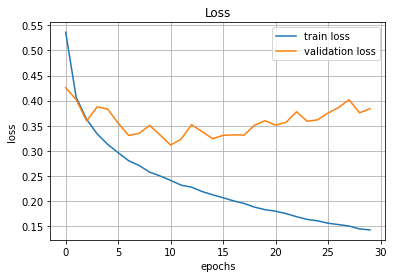

In [11]:
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')
plt.show()

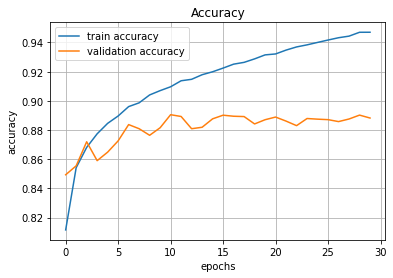

In [13]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')
plt.show()

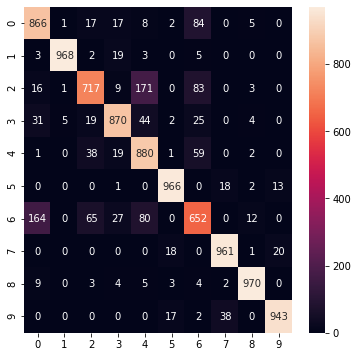

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(6, 6))

predicted_value = model.predict(x_test)

cm = confusion_matrix(t_test, np.argmax(predicted_value, axis=-1))
# t_test -> 테스트 데이터 정답(5, 7등의 10 진수)
# predicted_value 예측값 (softmax에 의해 10개로 출력됨) -> argmax 로 최대값 출력
sns.heatmap(cm, annot=True, fmt='d')
plt.show()